In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Step 1. Setup

# Pembacaan data kuis
kuis_1 = pd.read_csv('Rekap Penilaian Kuis 1.xlsx - SIAKNG.csv').rename(columns = {'Total':'Kuis 1'})
kuis_2 = pd.read_csv('Rekap Penilaian Kuis 2.xlsx - SIAKNG.csv').rename(columns = {'Total':'Kuis 2'})
kuis_3 = pd.read_csv('Rekap Penilaian Kuis 3.xlsx - SIAKNG.csv').rename(columns = {'Total':'Kuis 3'})
kuis_4 = pd.read_csv('Rekap Penilaian Kuis 4.xlsx - SIAKNG.csv').rename(columns = {'Total':'Kuis 4'})

rekap_kuis = pd.concat([kuis_1['NPM'],kuis_1['Nama'], kuis_1['Program Studi'], kuis_1['Person-in-Charge'],
                        kuis_1['Kuis 1'],
                        kuis_2['Kuis 2'],
                        kuis_3['Kuis 3'],
                        kuis_4['Kuis 4']
                        ], axis=1)
rekap_kuis.loc[0:11, 'Person-in-Charge'] = 'Abid'    
rekap_kuis.loc[12:23, 'Person-in-Charge'] = 'Darrel'  
rekap_kuis.loc[24:35, 'Person-in-Charge'] = 'Shirin'    
rekap_kuis.loc[36:48, 'Person-in-Charge'] = 'Fikri'   
rekap_kuis['Rerata'] = rekap_kuis[['Kuis 1','Kuis 2','Kuis 3','Kuis 4']].mean(axis=1)
rekap_kuis.describe()

,NPM,Kuis 1,Kuis 2,Kuis 3,Kuis 4,Rerata
count,4.900000e+01,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2.269542e+09,58.469388,53.683673,52.591837,47.107143,52.963010
std,9.049167e+07,20.327631,27.463934,31.982364,29.323359,23.683968
min,1.906400e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.306166e+09,48.000000,38.000000,40.000000,31.000000,35.250000
50%,2.306245e+09,62.000000,48.000000,58.000000,56.000000,58.250000
75%,2.306275e+09,69.000000,75.000000,78.000000,69.000000,71.187500
max,2.306276e+09,95.000000,105.000000,97.000000,90.000000,93.625000


In [3]:
#Step 2. Exploratory Data Analysis

mahasiswa_SI= rekap_kuis.loc[rekap_kuis['Program Studi'] == 'Sistem Informasi']
mahasiswa_IK= rekap_kuis.loc[rekap_kuis['Program Studi'] == 'Ilmu Komputer']

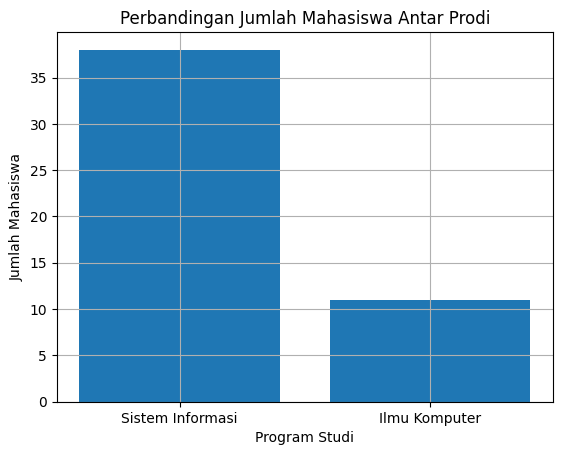

In [4]:
jumlah_mhs_SI = mahasiswa_SI['NPM'].count()
jumlah_mhs_IK = mahasiswa_IK['NPM'].count()

jumlah_mhs = [jumlah_mhs_SI, jumlah_mhs_IK]
prodi = ['Sistem Informasi', 'Ilmu Komputer']

plt.bar(prodi, jumlah_mhs)
plt.grid()

plt.xlabel('Program Studi')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Perbandingan Jumlah Mahasiswa Antar Prodi')

plt.show()

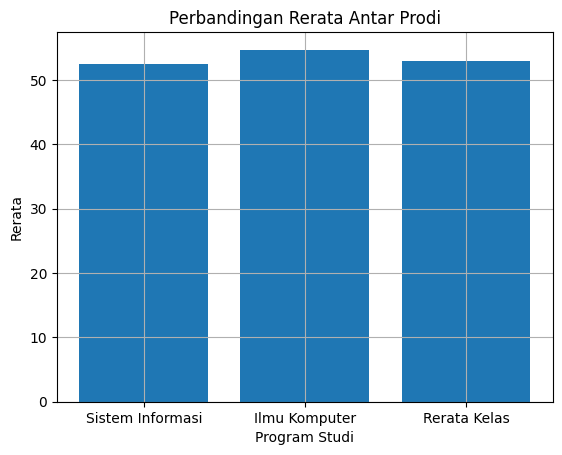

In [5]:
rerata_kuis = [mahasiswa_SI['Rerata'].mean(), mahasiswa_IK['Rerata'].mean(), rekap_kuis['Rerata'].mean()]
prodi = ['Sistem Informasi', 'Ilmu Komputer', 'Rerata Kelas']

plt.bar(prodi, rerata_kuis)
plt.grid()

plt.xlabel('Program Studi')
plt.ylabel('Rerata')
plt.title('Perbandingan Rerata Antar Prodi')

plt.show()

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_880\3813450829.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mahasiswa_SI['Nama'].groupby(pd.cut(mahasiswa_SI['Rerata'], np.arange(0, 106, 5))).count().plot(kind='bar')


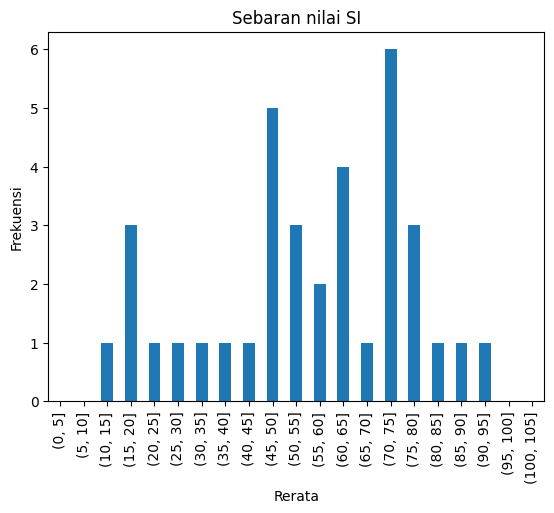

In [6]:
mahasiswa_SI['Nama'].groupby(pd.cut(mahasiswa_SI['Rerata'], np.arange(0, 106, 5))).count().plot(kind='bar')

plt.title('Sebaran nilai SI')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\Fikri Budianto\AppData\Local\Temp\ipykernel_880\3626812897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mahasiswa_IK['Nama'].groupby(pd.cut(mahasiswa_IK['Rerata'], np.arange(0, 106, 5))).count().plot(kind='bar')


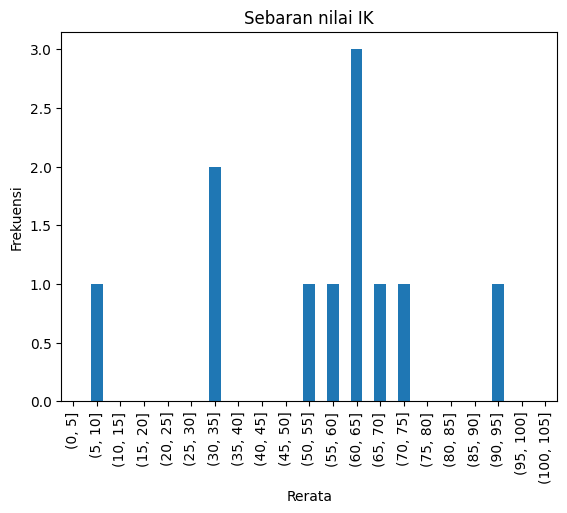

In [7]:
mahasiswa_IK['Nama'].groupby(pd.cut(mahasiswa_IK['Rerata'], np.arange(0, 106, 5))).count().plot(kind='bar')

plt.title('Sebaran nilai IK')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
#Step 3. Model Building
from sklearn.preprocessing import LabelEncoder

X = rekap_kuis.drop(['Nama', 'Kuis 4', 'Rerata', 'Person-in-Charge'], axis=1)
y = rekap_kuis['Kuis 4']

# Apply label encoding to prodi
label_encoder_prodi = LabelEncoder()
X['Program Studi'] = label_encoder_prodi.fit_transform(X['Program Studi'])

# #Apply label encoding to PIC
# label_encoder_pic = LabelEncoder()
# X['Person-in-Charge'] = label_encoder_pic.fit_transform(X['Person-in-Charge'])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
#Training menggunakan Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model_random_forest = RandomForestRegressor(n_estimators=2000, random_state=0)
model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

acc = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {acc}")

Mean Absulute Error: 21.892325


In [19]:
#Training menggunakan XGBoost
from xgboost import XGBRegressor

# Initialize the XGBRegressor model
model_xgb = XGBRegressor(n_estimators=2000, learning_rate=0.005)

# Train the model
model_xgb.fit(X_train, y_train)

# Make predictions
predictions = model_xgb.predict(X_test)

# Calculate and print the Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error: " + str(mae))

Mean Absolute Error: 24.768441046774388


In [20]:
#Training menggunakan KNN
from sklearn.neighbors import KNeighborsRegressor

K = 15
model_knn = KNeighborsRegressor(n_neighbors=K)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

# Calculate and print the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: " + str(mae))

Mean Absolute Error: 26.939999999999998
